<a href="https://colab.research.google.com/github/aksfasale/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

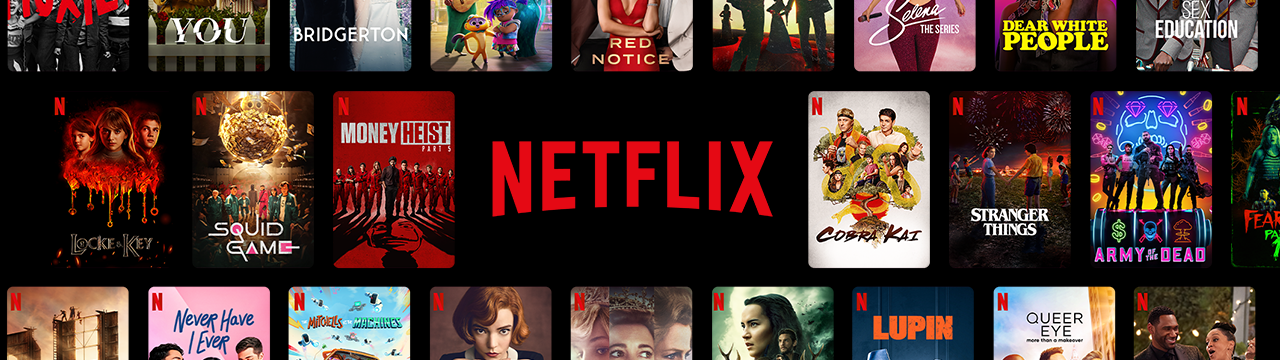

##**In this project, you are required to do**

1.   Exploratory Data Analysis
1.   Understanding what type content is available in different countries
2.   Is Netflix, increasingly focusing on TV rather than movies in recent years.
2.   Clustering similar content by matching text-based features








#**Attribute Information**



1. show_id : Unique ID for every Movie / Tv Show
2. type : Identifier - A Movie or TV Show
3. title : Title of the Movie / Tv Show
4. director : Director of the Movie 
5. cast : Actors involved in the movie / show
6. country : Country where the movie / show was produced
7. date_added : Date it was added on Netflix
8. release_year : Actual Releaseyear of the movie / show
9. rating : TV Rating of the movie / show
10. duration : Total Duration - in minutes or number of seasons
11. listed_in : Genere / Type of movie / show
12. description: The Summary description

#**Mounting the drive for importing the data**

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the data
dataset = pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')


# Make a copy of the dataset
netflix_df = dataset.copy()



#**Data Summary**

In [5]:
#dislplay first 5 rows 
netflix_df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
#Dislplaying last 5 rows

netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
# Shape of the dataset

numberofrows, numberofcolumns = netflix_df.shape
print('There are {} rows and {} columns'.format(numberofrows, numberofcolumns)+' in our Netflix Dataset.')

There are 7787 rows and 12 columns in our Netflix Dataset.


In [8]:
#columns in the dataframe
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
# Information about the dataset

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#**Missing value Inspection**

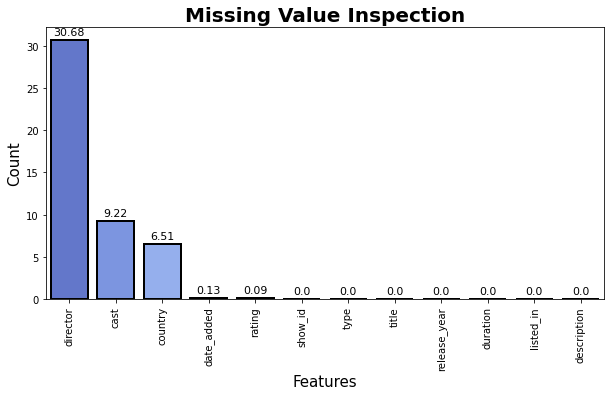

In [10]:
# Missing value Inspection

Value_Missing = netflix_df.isnull().sum().sort_values(ascending = False)
percent_missing = (netflix_df.isnull().sum() * 100 / len(netflix_df)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (10, 5))
plt.xticks(rotation = '90')
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'coolwarm', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
cplot.set_title('Missing Value Inspection', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);



This concludes that **'director'(30.68%)**, **'cast'(9.22%), 'country'(6.51%), 'date_added'(0.13%), **
**'rating'(0.09%)** are features with missing values.



In [11]:
# Unique values of all features

netflix_df.nunique().to_frame(name = 'Unique Values')

,Unique Values
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


In [12]:
# Rating insights

netflix_df['rating'].value_counts().to_frame()

,rating
TV-MA,2863
TV-14,1931
TV-PG,806
R,665
PG-13,386
TV-Y,280
TV-Y7,271
PG,247
TV-G,194
NR,84


In [13]:
# country inspection

netflix_df['country'].value_counts().to_frame().head()

,country
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183


In [14]:
# Missing value imputation

netflix_df['rating'].replace(np.nan, 'TV-MA', inplace  = True)
netflix_df['country'].replace(np.nan, 'United States', inplace  = True)
netflix_df['cast'].replace(np.nan, 'missing info', inplace  = True)

In [15]:
# Drop null values of 'date_added'

netflix_df['date_added'].dropna(axis = 0, inplace = True)

In [16]:
# Shape of the dataset
print('There are {} rows and {} columns'.format(netflix_df.shape[0], netflix_df.shape[1])+' in our modified Netflix Dataset.')

There are 7787 rows and 12 columns in our modified Netflix Dataset.


In [17]:
# Generate count statistics of duplicate entries

if (len(netflix_df[netflix_df.duplicated()]) > 0):
    print('No. of duplicated entries: ', len(netflix_df[netflix_df.duplicated()]))
    print(netflix_df[netflix_df.duplicated(keep = False)].sort_values(by = list(netflix_df.columns)).head())
else:
    print('No duplicated entries found.')

No duplicated entries found.


Text(0.5, 1.0, 'Proportion of Show types')

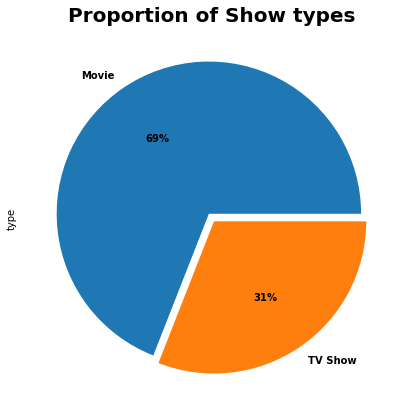

In [29]:
# type analysis
typ =netflix_df['type'].value_counts()
typ.plot.pie(x='TV Shows', y ='Movies',autopct='%1.0f%%',textprops={'weight': 'bold'},figsize =(7,7),explode =[0.03]*2, ) 
plt.title('Proportion of Show types',fontweight="bold", size=20)




*   The pie chart concludes that 69% of the Netflix shows are Movies and 31% are TV Shows



In [ ]:
# Show type vs Rating

type_TvShow = netflix_df[netflix_df['type'] == 'TV Show']['rating']
trace0 = go.Box(y = type_TvShow, name = 'Rating of TV Shows',
              marker = dict(color = 'rgb(214, 12, 140)',))

type_Movie = netflix_df[netflix_df['type'] == 'Movie']['rating']
trace1 = go.Box(y = type_Movie, name = 'Rating of Movies',
              marker = dict(color = 'rgb(0, 128, 128)',))

layout = go.Layout(title = 'Box Plots of Netflix Shows',width = 800, height = 500)

data = [trace0, trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

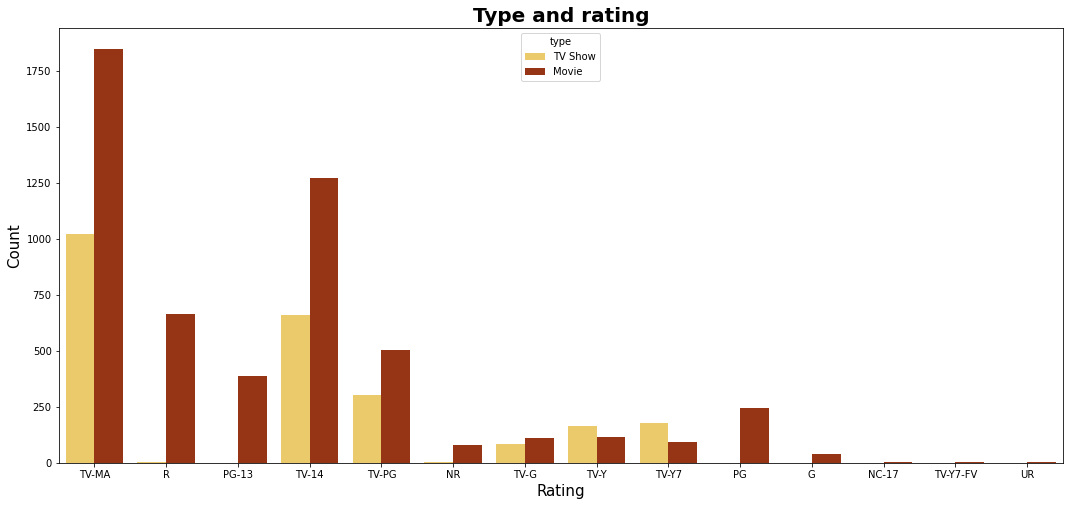

In [ ]:
# Show type vs Rating

plt.figure(figsize = (18,8))
sns.countplot(x = 'rating', hue = 'type', data = netflix_df, palette = 'afmhot_r')
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Type and rating', size = '20', fontweight = 'bold')
plt.show();

In [ ]:
# Creating new column for age rating

rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_df['age_rating'] = netflix_df['rating'].replace(rating_ages)
netflix_df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

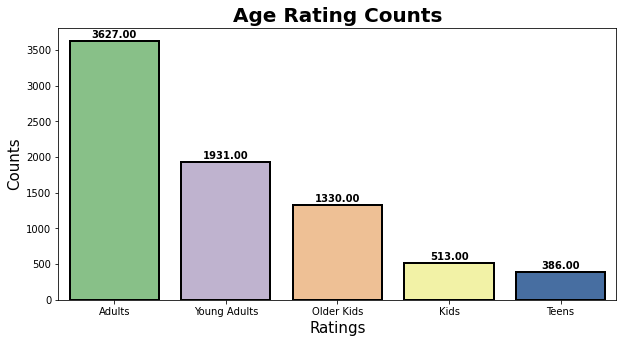

In [ ]:
# Countplot for Adult, Teen, Kids, Older Kids
f, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot('age_rating', data = netflix_df, lw = 2, ec = 'black', palette = 'Accent',
                  order = netflix_df['age_rating'].value_counts().index)
plt.title('Age Rating Counts', fontsize = 20, fontweight = 'bold',)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()), ha = 'center', va = 'center', xytext = (0, 6), 
  textcoords = 'offset points', fontsize = 10, fontweight = 'bold')

In [ ]:
# Release year insights

netflix_df['release_year'].value_counts().to_frame(name = 'Count').head(10)

,Count
2018,1121
2017,1012
2019,996
2016,882
2020,868
2015,541
2014,334
2013,267
2012,219
2010,173


In [ ]:
# Year wise Netflix Shows

fig = go.Figure()
year = netflix_df['release_year'].value_counts().to_frame().head(10).index
yearly_movies = netflix_df[netflix_df.type == 'TV Show']['release_year'].value_counts().head(10)
trace0 = go.Scatter(x = year, y = yearly_movies, name = 'Yearly Movies',
              marker = dict(color = 'rgb(255,140,0)',))

yearly_TV_shows = netflix_df[netflix_df.type == 'Movie']['release_year'].value_counts().head(10)
trace1 = go.Scatter(x = year, y = yearly_TV_shows, name = 'Yearly TV Shows',
              marker = dict(color = 'rgb(3,168,158)',))

total_content = netflix_df['release_year'].value_counts().head(10)
trace2 = go.Scatter(x = year, y = total_content, name = 'Total Content',
              marker = dict(color = 'rgb(255,106,106)',))


layout = go.Layout(title = 'Line plot of Netflix Shows',width = 1000, height = 500)

data = [trace0, trace1, trace2]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)



In [ ]:
# Top cast in netflix shows

netflix_df['cast_name'] = netflix_df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix_df['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

netflix_df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending = False).rename(
    columns = {'index' : 'Cast Name', 0 : 'Count'}).iloc[1:]
netflix_df_cast_count.head()

,Cast Name,Count
1296,Anupam Kher,38
194,Takahiro Sakurai,28
4051,Shah Rukh Khan,27
2214,Om Puri,27
742,Boman Irani,25


In [ ]:
# Top five directors of the netflix shows

netflix_df['director'].value_counts().to_frame(name = 'Count').head()

,Count
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12


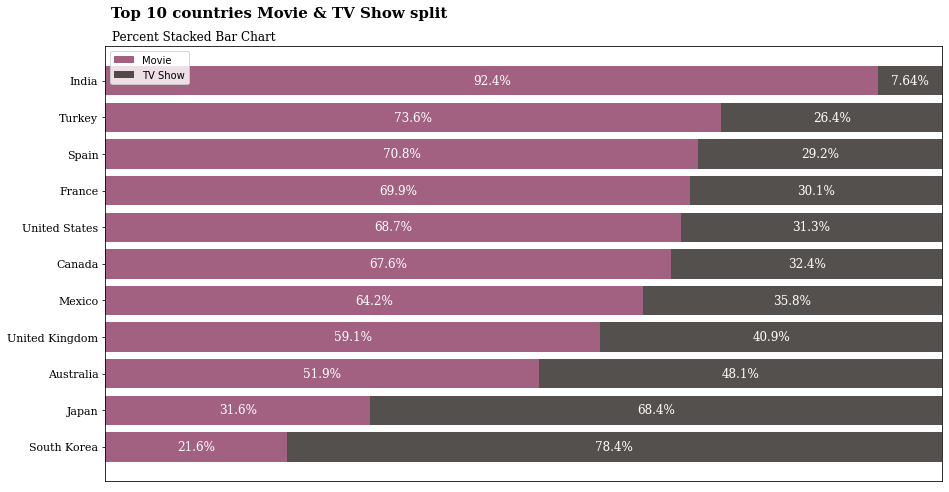

In [ ]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split

# Lets retrieve just the first country
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['principal_country'].head()

country_order = netflix_df['principal_country'].value_counts()[:11].index
content_data = netflix_df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='#8B3A62', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='#292421', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(content_data_ratio.index, fontfamily='serif', fontsize=11)

# Addind Annotaion
for i in content_data_ratio.index:
    ax.annotate(f"{content_data_ratio['Movie'][i]*100:.3}%", 
                   xy=(content_data_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', 
                   fontfamily='serif', color='white')

for i in content_data_ratio.index:
    ax.annotate(f"{content_data_ratio['TV Show'][i]*100:.3}%", 
                   xy=(content_data_ratio['Movie'][i]+content_data_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', 
                   fontfamily='serif', color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize = 15, 
        fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   
plt.legend()
plt.show()